In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Transformed_Housing_Data2.csv')
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
data['mean_sales']=data['Sale_Price'].mean()
data['mean_sales'].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sales, dtype: float64

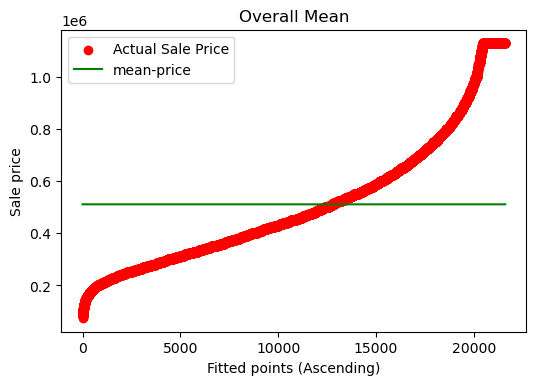

In [7]:
plt.figure(dpi=100)
k=range(0, len(data))
plt.scatter(k, data['Sale_Price'].sort_values(), color='red', label='Actual Sale Price')
plt.plot(k, data['mean_sales'].sort_values(), color='green', label='mean-price')
plt.xlabel('Fitted points (Ascending)')
plt.ylabel('Sale price')
plt.title('Overall Mean')
plt.legend()

In [8]:
grades_mean = data.pivot_table(values='Sale_Price',columns='Overall Grade',aggfunc=np.mean)
grades_mean

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [9]:
# Making new column
data['grade_mean']=0

# for every grade fill its mean price in new column
for i in grades_mean.columns:
  data['grade_mean'][data['Overall Grade']==i]= grades_mean[i][0]
data['grade_mean'].head()

C:\Users\USER\AppData\Local\Temp\ipykernel_8580\3008403895.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['grade_mean'][data['Overall Grade']==i]= grades_mean[i][0]


0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grade_mean, dtype: float64

In [10]:
# visualizing
gradewise_list = []
for i in range(1,11):
  k = data['Sale_Price'][data['Overall Grade']==i]
  gradewise_list.append(k)


In [11]:
classwise_list = []
for i in range(1,11):
  k = data['Sale_Price'][data['Overall Grade']==i]
  classwise_list.append(k)

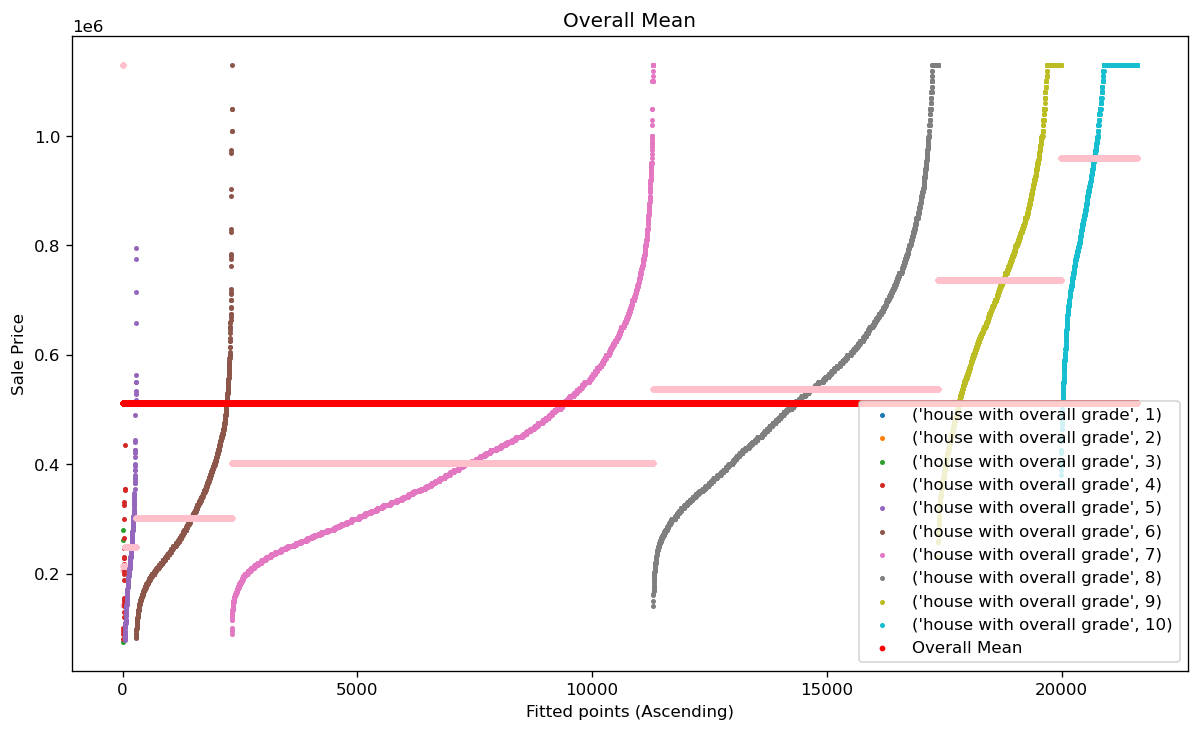

In [13]:
plt.figure(dpi=120,figsize=(12,7))
###### Plotting 'Sale_price' gradewise #######
# z variable is for x-axis
z=0
for i in range(1,11):
  points=[k for k in range(z,z+len(classwise_list[i-1]))]

  plt.scatter(points, classwise_list[i-1].sort_values(),label=('house with overall grade',i),s=4)

  plt.scatter(points,[classwise_list[i-1].mean() for q in range(len(classwise_list[i-1]))],s=6,
              color='pink')
  z=max(points)+1

############ Plotting overall mean ##########
plt.scatter([q for q in range(0,z)],
            data['mean_sales'],
            color='red',
            label='Overall Mean',
            s=6)
plt.xlabel("Fitted points (Ascending)")
plt.ylabel("Sale Price")
plt.title("Overall Mean")
plt.legend(loc=4)


# Residual Plot

In [15]:
mean_difference = data['mean_sales']- data['Sale_Price']
grade_mean_difference = data['grade_mean']-data['Sale_Price']

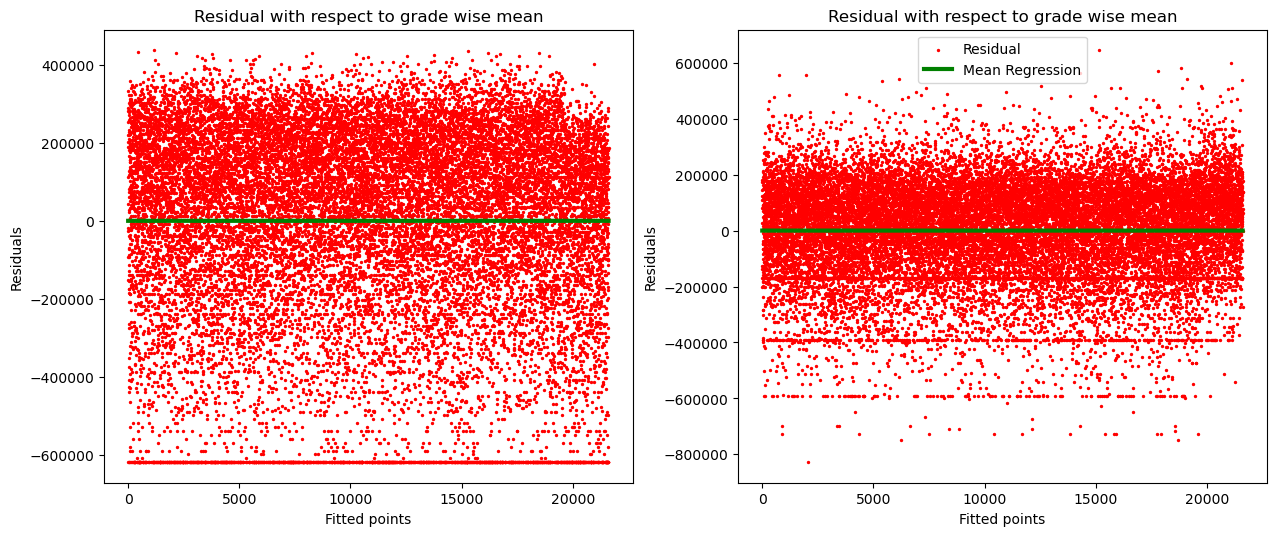

In [16]:
k = range(0,len(data))
l = [0 for i in range(len(data))]

plt.figure(figsize=(15,6),dpi=100)

plt.subplot(1,2,1)
plt.scatter(k,mean_difference,color='red',label='Residual',s=2)
plt.plot(k,l,color='green',label='Mean Regression',linewidth=3)
plt.xlabel("Fitted points")
plt.ylabel('Residuals')
plt.title("Residual with respect to grade wise mean")

plt.subplot(1,2,2)
plt.scatter(k,grade_mean_difference,color='red',label='Residual',s=2)
plt.plot(k,l,color='green',label='Mean Regression',linewidth=3)
plt.xlabel("Fitted points")
plt.ylabel('Residuals')
plt.title("Residual with respect to grade wise mean")


plt.legend()

# Model Evaluation Metrics

In [17]:
cost = sum(mean_difference)/len(data)
print(round(cost,7))

0.0


In [18]:
Y= data['Sale_Price']
Y_hat1= data['mean_sales']
Y_hat2= data['grade_mean']

n= len(data)
len(Y), len(Y_hat1),len(Y_hat2),n

(21609, 21609, 21609, 21609)

In [19]:
# MAE for first model
cost_mean= sum(abs(Y_hat1-Y))/n
cost_mean

199168.78146839526

In [20]:
# MAE for model 2
cost_grade_mean= sum(abs(Y_hat2-Y))/n
cost_grade_mean

137081.70298203363

In [21]:
from sklearn.metrics import mean_absolute_error
cost_grade_mean = mean_absolute_error(Y_hat2,Y)
cost_grade_mean

137081.7029820291

# Mean Squared Error

In [22]:
from sklearn.metrics import mean_squared_error
cost_mean=mean_squared_error(Y_hat1,Y)
cost_grade_mean= mean_squared_error(Y_hat2,Y)
cost_mean, cost_grade_mean

(62528116847.799576, 30804835720.342426)

In [23]:
from sklearn.metrics import mean_squared_error
cost_mean=mean_squared_error(Y_hat1,Y)**0.5
cost_grade_mean= mean_squared_error(Y_hat2,Y)**0.5
cost_mean, cost_grade_mean

(250056.2273725643, 175513.06424406826)

In [25]:
Y = data['Sale_Price']
Y_bar= data['mean_sales']
Y_hat= data['grade_mean']
n=len(data)

In [26]:
mse_mean = mean_squared_error(Y_bar,Y)
mse_mean

62528116847.799576

In [27]:
mse_model= mean_squared_error(Y_hat,Y)
mse_model

30804835720.342426

In [28]:
R2= 1-(mse_model/mse_mean)
R2

0.5073442592981836

In [29]:
# Making the regression model for sale_price based on flat_area
sale_price = data['Sale_Price'].head(30)
flat_area = data['Flat Area (in Sqft)'].head(30)
sample_data= pd.DataFrame({'sale_price':sale_price, 'flat_area':flat_area})
sample_data

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


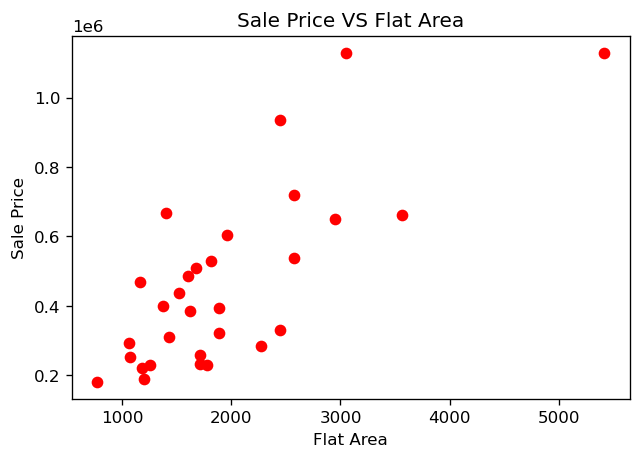

In [30]:
plt.figure(dpi=120)
plt.scatter(sample_data.flat_area, sample_data.sale_price,color='red')
plt.xlabel("Flat Area")
plt.ylabel("Sale Price")
plt.title('Sale Price VS Flat Area')
plt.show()

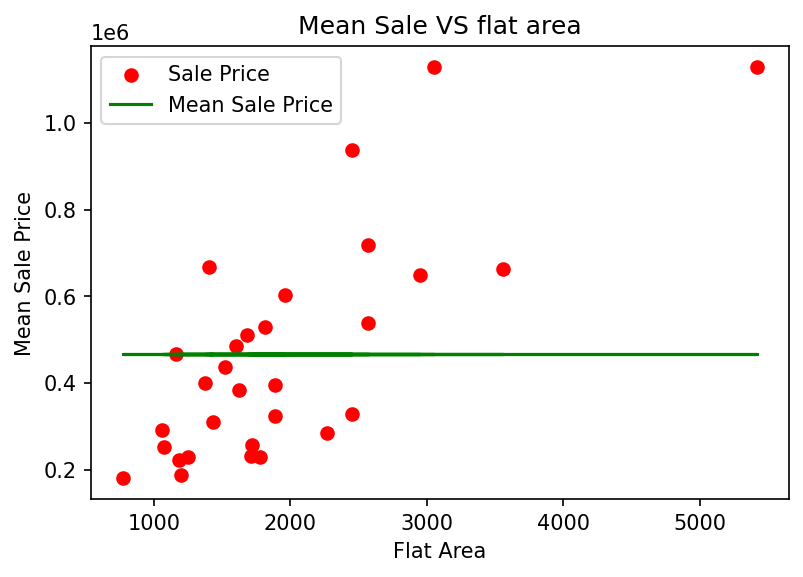

In [31]:
# Making Mean sale Price model

sample_data['mean_sale_price'] = sample_data.sale_price.mean()
plt.figure(dpi=150)
plt.scatter(sample_data.flat_area, sample_data.sale_price,color='red',label='Sale Price')
plt.plot(sample_data.flat_area,sample_data.mean_sale_price,color='green',label="Mean Sale Price")
plt.xlabel('Flat Area')
plt.ylabel('Mean Sale Price')
plt.title('Mean Sale VS flat area')
plt.legend()
plt.show()

# Parameter of Linear Regression Model

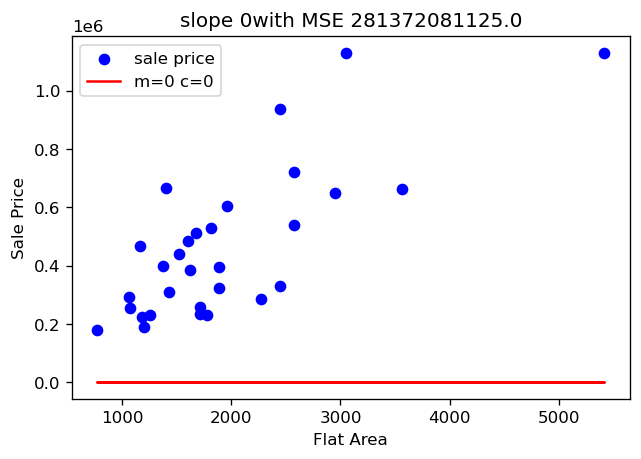

In [32]:
c=0
m=0
line=[]

for i in range(len(sample_data)):
  line.append(sample_data.flat_area[i]*m+c)

plt.figure(dpi=120)
plt.scatter(sample_data.flat_area,sample_data.sale_price,color='blue',label='sale price')
plt.plot(sample_data.flat_area,line,color='red',label='m=0 c=0')
plt.xlabel('Flat Area')
plt.ylabel('Sale Price')
MSE= mean_squared_error(sample_data.sale_price,line)
plt.title("slope "+ str(m)+ "with MSE "+ str(MSE))
plt.legend()
plt.show()

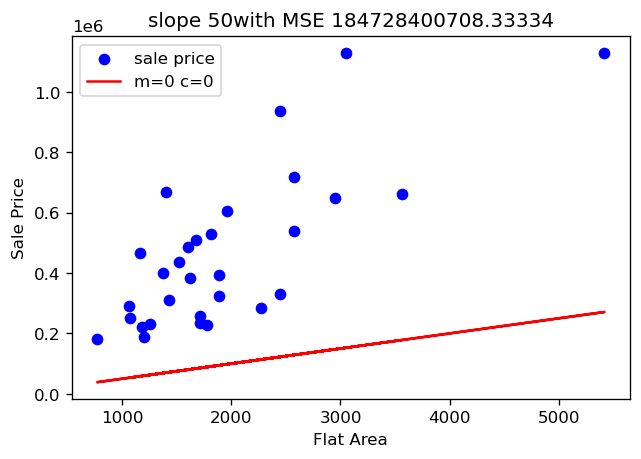

In [33]:
c=0
m=50
line=[]

for i in range(len(sample_data)):
  line.append(sample_data.flat_area[i]*m+c)

plt.figure(dpi=120)
plt.scatter(sample_data.flat_area,sample_data.sale_price,color='blue',label='sale price')
plt.plot(sample_data.flat_area,line,color='red',label='m=0 c=0')
plt.xlabel('Flat Area')
plt.ylabel('Sale Price')
MSE= mean_squared_error(sample_data.sale_price,line)
plt.title("slope "+ str(m)+ "with MSE "+ str(MSE))
plt.legend()
plt.show()

In [34]:
# Automated the task

def slope_Error(slope,intercept,sample_data):
  sale=[]
  for i in range(len(sample_data.flat_area)):
    tmp= sample_data.flat_area[i]*slope+intercept
    sale.append(tmp)
  MSE= mean_squared_error(sample_data.sale_price,sale)
  return MSE

In [35]:
slope = [i/10 for i in range(0,5000)]
Cost=[]
for i in slope:
  cost= slope_Error(slope=i,intercept=0,sample_data=sample_data)
  Cost.append(cost)

In [36]:
Cost_table = pd.DataFrame({
    'slope':slope,
    'cost':Cost
})
Cost_table.tail()

,slope,cost
4995,499.5,3.526038e+11
4996,499.6,3.528488e+11
4997,499.7,3.530938e+11
4998,499.8,3.533389e+11
4999,499.9,3.535842e+11


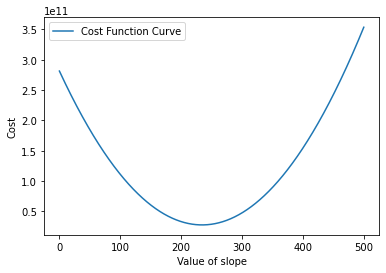

In [37]:
plt.plot(Cost_table.slope,Cost_table.cost,label="Cost Function Curve")
plt.xlabel("Value of slope")
plt.ylabel("Cost")
plt.legend()

In [38]:
new_slope = Cost_table['slope'][Cost_table['cost']==Cost_table['cost'].min()].values
new_slope[0]

234.3

In [39]:
def intercept_Error(slope,intercept,sample_data):
  sale=[]
  for i in range(len(sample_data.flat_area)):
    tmp= sample_data.flat_area[i]*slope+intercept
    sale.append(tmp)
  MSE= mean_squared_error(sample_data.sale_price,sale)
  return MSE

In [40]:
intercept = [i for i in range(5000,50000)]
Cost= []
for i in intercept:
  cost= intercept_Error(slope=234,intercept=i,sample_data=sample_data)
  Cost.append(cost)

In [42]:
intercept_table = pd.DataFrame({
    'intercept':intercept,
    'cost':Cost
})
intercept_table.head()

,intercept,cost
0,5000,2.779911e+10
1,5001,2.779909e+10
2,5002,2.779908e+10
3,5003,2.779907e+10
4,5004,2.779906e+10


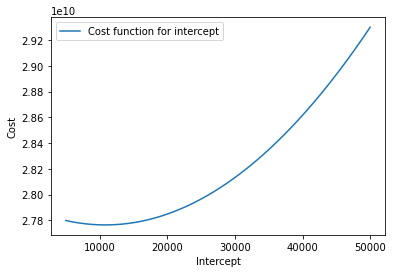

In [43]:
# plotting the intercept plot
plt.plot(intercept_table.intercept,intercept_table.cost,label='Cost function for intercept')
plt.xlabel("Intercept")
plt.ylabel("Cost")
plt.legend()
plt.show()


In [44]:
new_intercept = intercept_table['intercept'][intercept_table['cost']==intercept_table['cost'].min()].values
new_intercept[0]

10834

In [45]:
slope = [i/10 for i in range(0,5000)]
Cost=[]
for i in slope:
  cost= slope_Error(slope=i,intercept=10834,sample_data=sample_data)
  Cost.append(cost)

In [46]:
Cost_table = pd.DataFrame({
    'slope':slope,
    'cost':Cost
})
Cost_table.tail()

,slope,cost
4995,499.5,3.636767e+11
4996,499.6,3.639259e+11
4997,499.7,3.641751e+11
4998,499.8,3.644245e+11
4999,499.9,3.646739e+11


In [47]:
new_slope = Cost_table['slope'][Cost_table['cost']==Cost_table['cost'].min()].values
new_slope[0]

229.7

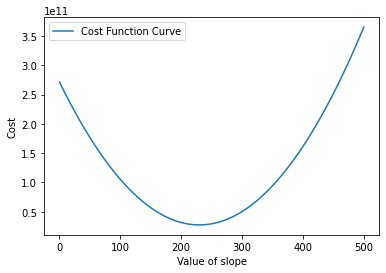

In [48]:
plt.plot(Cost_table.slope,Cost_table.cost,label="Cost Function Curve")
plt.xlabel("Value of slope")
plt.ylabel("Cost")
plt.legend()

# Implementing Gradient Descent

In [49]:
def param_init(Y):
  '''
  Step-1
  Y= target variable
  return initialize value of m and c
  '''

  m=0.1
  c=Y.mean()
  return m,c

In [50]:
def generate_prediction(m,c,X):
  '''
  step-2
  X= independent variable
  return prediction generated by line with parameters m,c
  '''
  prediction=[]
  for x in X:
    pred=(m*x)+c
    prediction.append(pred)
  return prediction

In [51]:
def compute_cost(prediction,Y):
  '''
  step-3
  return the mean squared error between prediction and Y
  '''
  cost = np.sum(((prediction-Y)**2)/len(Y))
  return cost

In [52]:
def gradient(prediction,Y,X):
  '''
  step-4 part-1
  return Gradient corresponding to m and c
  '''
  n=len(Y)
  Gm = 2/n*np.sum((prediction-Y)*X)
  Gc = 2/n*np.sum((prediction-Y))
  return Gm,Gc

In [54]:
def param_update(m_old,c_old,Gm_old,Gc_old,alpha):
  '''
  step-4 part-2
  Update and return the new value of m and c
  '''
  m_new = m_old-alpha*Gm_old
  c_new = c_old-alpha*Gc_old
  return m_new,c_new

In [55]:
def result(m,c,X,Y,cost,predictions,i):
  # print and plot the final result obtained from gradient descent
  # If the Gradient Descent converged to the optimum value before max_iter

  if i<max_iter-1:
    print("****** Gradient Descent has converged at iteration {} ******".format(i))
  else:
    print("******* Result after",max_iter,'iteration is: *****')
  
  # Plotting the final result
  plt.figure(figsize=(14,7),dpi=120)
  plt.scatter(X,Y,color='red',label='data points')
  label='final regression line: m={}; c={}'.format(str(m),str(c))
  plt.plot(X,predictions,color='blue',label=label)
  plt.xlabel('Flat_area')
  plt.ylabel('Sale_price')
  plt.title('Final regression line')
  plt.legend()

After Iteration 0 : m = 3499072.307222223 ; c = 465999.44299999997 ; Cost = 64177937552.075005
After Iteration 20 : m = 7.115927055971628e+105 ; c = 2.997778392048355e+102 ; Cost = 2.7417231010181384e+208
After Iteration 40 : m = 1.447154337383132e+205 ; c = 6.096532424296826e+201 ; Cost = inf
After Iteration 60 : m = 2.9430538842431367e+304 ; c = 1.2398417341018387e+301 ; Cost = inf
After Iteration 80 : m = nan ; c = nan ; Cost = nan
After Iteration 100 : m = nan ; c = nan ; Cost = nan
After Iteration 120 : m = nan ; c = nan ; Cost = nan
After Iteration 140 : m = nan ; c = nan ; Cost = nan
After Iteration 160 : m = nan ; c = nan ; Cost = nan
After Iteration 180 : m = nan ; c = nan ; Cost = nan
After Iteration 200 : m = nan ; c = nan ; Cost = nan
After Iteration 220 : m = nan ; c = nan ; Cost = nan
After Iteration 240 : m = nan ; c = nan ; Cost = nan
After Iteration 260 : m = nan ; c = nan ; Cost = nan
After Iteration 280 : m = nan ; c = nan ; Cost = nan
After Iteration 300 : m = nan ;

C:\Users\USER\AppData\Local\Temp\ipykernel_8580\2010361153.py:6: RuntimeWarning: overflow encountered in square
  cost = np.sum(((prediction-Y)**2)/len(Y))
C:\Users\USER\AppData\Local\Temp\ipykernel_8580\1334523716.py:23: RuntimeWarning: invalid value encountered in double_scalars
  if abs(cost_new - cost_old) < 10**(-7):
C:\Users\USER\AppData\Local\Temp\ipykernel_8580\1413743921.py:7: RuntimeWarning: overflow encountered in multiply
  Gm = 2/n*np.sum((prediction-Y)*X)
C:\Users\USER\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\USER\AppData\Local\Temp\ipykernel_8580\255567706.py:6: RuntimeWarning: invalid value encountered in double_scalars
  m_new = m_old-alpha*Gm_old
C:\Users\USER\AppData\Local\Temp\ipykernel_8580\255567706.py:7: RuntimeWarning: invalid value encountered in double_scalars
  c_new = c_old-alpha*Gc_old


After Iteration 820 : m = nan ; c = nan ; Cost = nan
After Iteration 840 : m = nan ; c = nan ; Cost = nan
After Iteration 860 : m = nan ; c = nan ; Cost = nan
After Iteration 880 : m = nan ; c = nan ; Cost = nan
After Iteration 900 : m = nan ; c = nan ; Cost = nan
After Iteration 920 : m = nan ; c = nan ; Cost = nan
After Iteration 940 : m = nan ; c = nan ; Cost = nan
After Iteration 960 : m = nan ; c = nan ; Cost = nan
After Iteration 980 : m = nan ; c = nan ; Cost = nan
******* Result after 1000 iteration is: *****


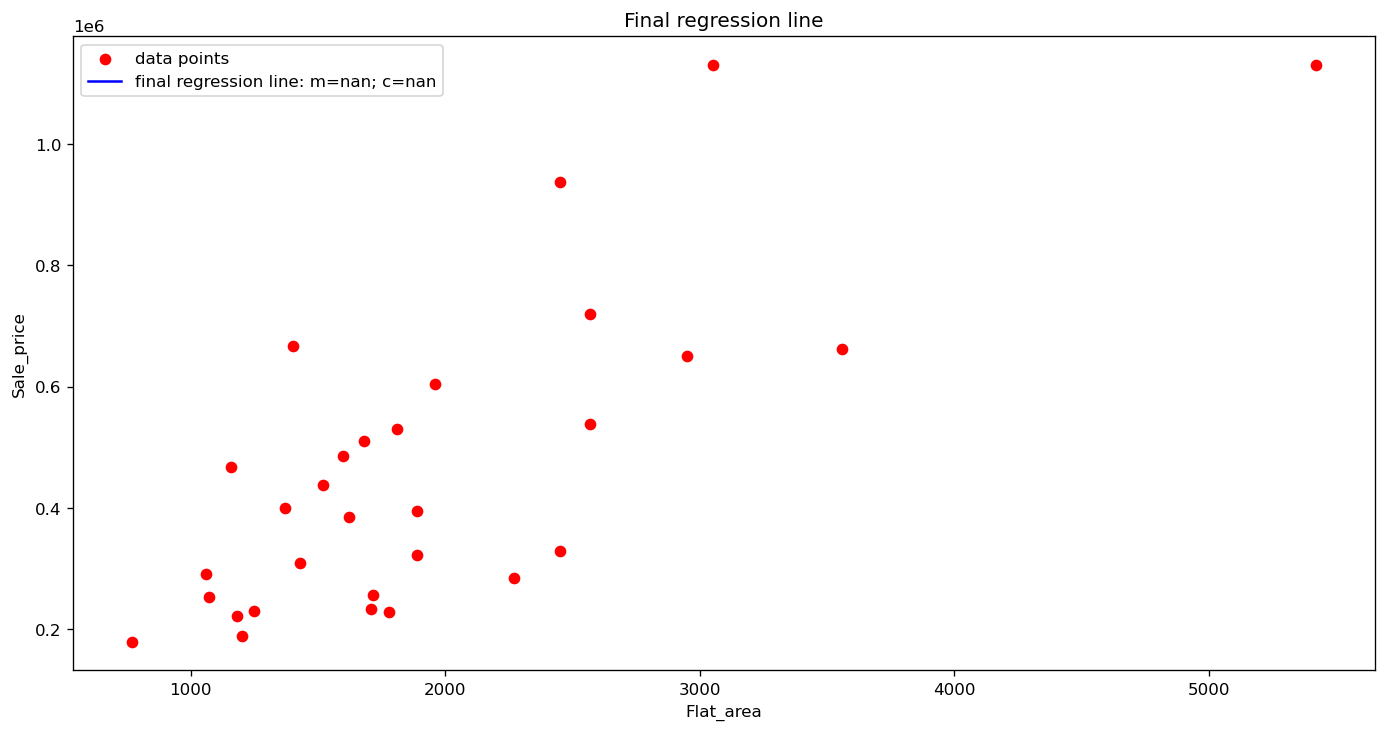

In [56]:
## defining and reshaping the dataset
sale_price = sample_data['sale_price'].values.reshape(-1,1)
flat_area = sample_data['flat_area'].values.reshape(-1,1)

## declaring parameters
max_iter = 1000
cost_old = 0
alpha = 0.01

## Step 1: inititialising the values of m, c
m , c = param_init(sale_price)

## Gradient Descent in action
for i in range(0 , max_iter):
  
  ## Step 2: genrating predictions
  predictions = generate_prediction(m , c , flat_area)

  ## Step 3: calculating cost
  cost_new = compute_cost(predictions , sale_price)

  ## checking if GD converged
  if abs(cost_new - cost_old) < 10**(-7):
    break
  
  ## calculating gradients
  Gm, Gc = gradient(predictions, sale_price,
                     flat_area)
  
  ## Step 4: updating parameters m and c
  m, c = param_update(m, c, Gm, Gc, alpha)

  ## display result after every 20 iterations
  if i%20 == 0:
    print('After Iteration', i,': m =', m, '; c =', c,'; Cost =', cost_new)

  ##updating cost_old
  cost_old = cost_new

## final results
result(m , c, flat_area, sale_price,
       cost_new, predictions, i)

After Iteration 0 : m = 0.11316346413633305 ; c = 1.1849780416165836e-16 ; Cost = 0.85836535863667
After Iteration 20 : m = 0.3275595607435688 ; c = 1.240489192847842e-16 ; Cost = 0.6182472245590185
After Iteration 40 : m = 0.4706921039517346 ; c = 1.3248661427193537e-16 ; Cost = 0.5112264752046607
After Iteration 60 : m = 0.5662485308150865 ; c = 1.415904430738617e-16 ; Cost = 0.46352728398628984
After Iteration 80 : m = 0.6300427631414932 ; c = 1.4951003398285442e-16 ; Cost = 0.4422677351921283
After Iteration 100 : m = 0.6726323011945988 ; c = 1.611303683072644e-16 ; Cost = 0.4327923457067555
After Iteration 120 : m = 0.7010654163122192 ; c = 1.666074685620818e-16 ; Cost = 0.42856916078553225
After Iteration 140 : m = 0.7200475906265729 ; c = 1.6660746856208182e-16 ; Cost = 0.4266868855601835
After Iteration 160 : m = 0.7327202415200801 ; c = 1.669405354694694e-16 ; Cost = 0.42584795473189874
After Iteration 180 : m = 0.7411806042798547 ; c = 1.6694053546946945e-16 ; Cost = 0.425474

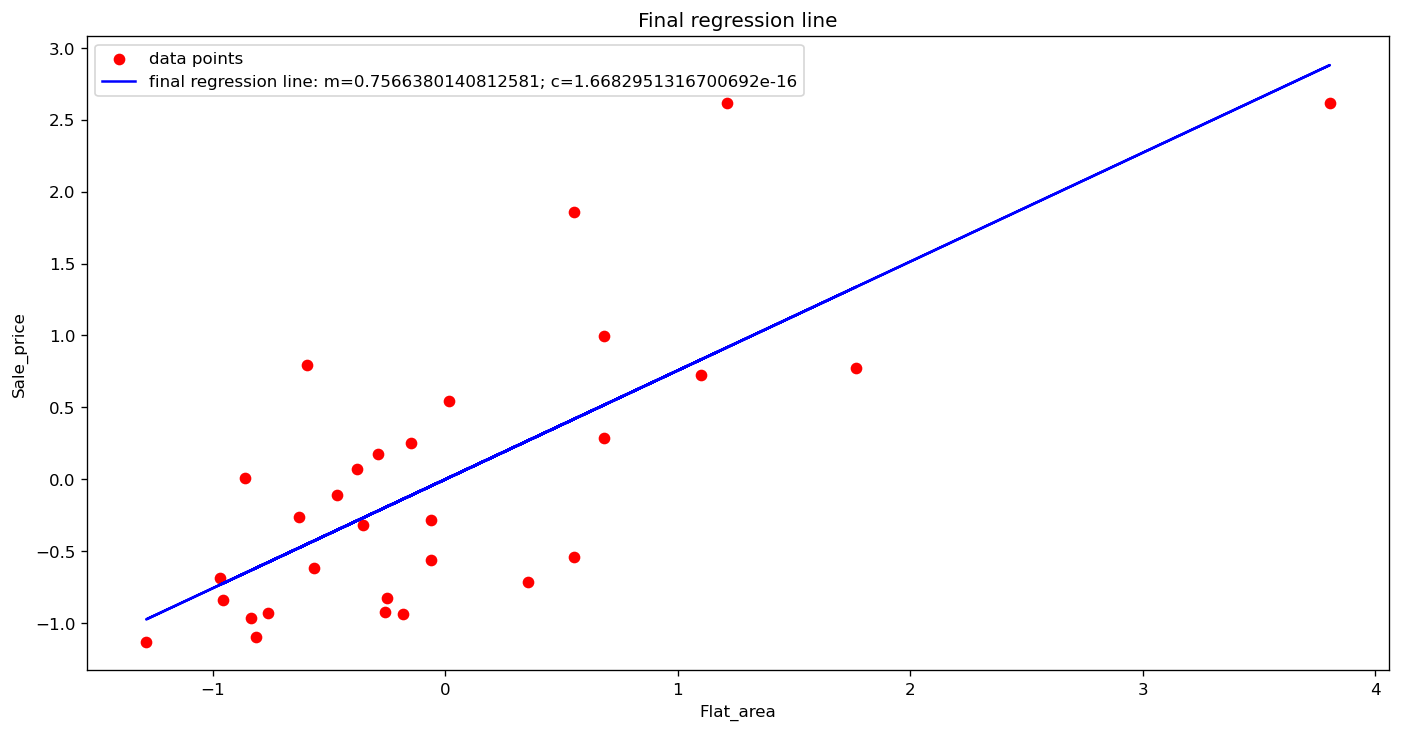

In [57]:
# Gradient Desecent with scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
## defining and reshaping the dataset
sale_price = scaler.fit_transform(sample_data['sale_price'].values.reshape(-1,1))
flat_area = scaler.fit_transform(sample_data['flat_area'].values.reshape(-1,1))

## declaring parameters
max_iter = 1000
cost_old = 0
alpha = 0.01

## Step 1: inititialising the values of m, c
m , c = param_init(sale_price)

## Gradient Descent in action
for i in range(0 , max_iter):
  
  ## Step 2: genrating predictions
  predictions = generate_prediction(m , c , flat_area)

  ## Step 3: calculating cost
  cost_new = compute_cost(predictions , sale_price)

  ## checking if GD converged
  if abs(cost_new - cost_old) < 10**(-7):
    break
  
  ## calculating gradients
  Gm, Gc = gradient(predictions, sale_price,
                     flat_area)
  
  ## Step 4: updating parameters m and c
  m, c = param_update(m, c, Gm, Gc, alpha)

  ## display result after every 20 iterations
  if i%20 == 0:
    print('After Iteration', i,': m =', m, '; c =', c,'; Cost =', cost_new)

  ##updating cost_old
  cost_old = cost_new

## final results
result(m , c, flat_area, sale_price,
       cost_new, predictions, i)

# Treating Multicollinearity

In [58]:
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9,mean_sales,grade_mean
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,511618.558147,402239.619779
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,1,0,0,0,0,0,0,0,511618.558147,402239.619779
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,1,0,0,0,0,0,0,0,511618.558147,301882.014720
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,1,0,0,0,0,0,0,511618.558147,402239.619779
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,1,0,0,0,0,0,511618.558147,537584.082097


In [59]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y= data['Sale_Price']  # target variable
X = scaler.fit_transform(data.drop(columns=['Sale_Price']))
X = pd.DataFrame(data=X,columns=data.drop(columns=['Sale_Price']).columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9,mean_sales,grade_mean
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,...,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,1.746230e-10,-0.614108
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,...,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,1.746230e-10,-0.614108
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,...,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,1.746230e-10,-1.177565
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,...,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,1.746230e-10,-0.614108
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,...,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,1.746230e-10,0.145783


In [60]:
#Checking and removing multicollinearity
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9,mean_sales,grade_mean
No of Bedrooms,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,...,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694,NaN,0.336276
No of Bathrooms,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,...,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871,NaN,0.638131
Flat Area (in Sqft),0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,...,-0.063005,-0.078761,0.086139,0.075978,0.160045,0.051211,0.169576,0.090253,NaN,0.751262
Lot Area (in Sqft),0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,...,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671,NaN,0.120503
No of Floors,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,...,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868,NaN,0.449453
No of Times Visited,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,...,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923,NaN,0.251620
Overall Grade,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,...,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638,NaN,0.955963
Area of the House from Basement (in Sqft),0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,...,-0.052418,-0.090628,0.086640,0.062267,0.129310,0.029477,0.134021,0.087398,NaN,0.753757
Basement Area (in Sqft),0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,...,-0.032302,0.006247,0.016422,0.040662,0.090206,0.051128,0.101159,0.023775,NaN,0.148740
Age of House (in Years),-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,0.053395,-0.456711,-0.423848,0.133072,1.000000,...,0.022094,0.095882,-0.056974,-0.009965,0.025718,0.101486,-0.002705,-0.002492,NaN,-0.423689


In [61]:
# pair of independent variables with corellation greater then 0.5
k = X.corr()
z= [[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j]>0.5 and (i!=j))]
z,len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['No of Bathrooms', 'grade_mean'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'grade_mean'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Over

# Calculating VIF

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=X

# calculating VIF for each column
VIF = pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF

No of Bedrooms                                  1.700187
No of Bathrooms                                 3.375782
Flat Area (in Sqft)                          1482.038878
Lot Area (in Sqft)                              2.108170
No of Floors                                    2.129338
No of Times Visited                             1.438889
Overall Grade                                  13.055456
Area of the House from Basement (in Sqft)    1205.601277
Basement Area (in Sqft)                       345.481515
Age of House (in Years)                         2.634330
Latitude                                        2.471466
Longitude                                       1.675510
Living Area after Renovation (in Sqft)          3.085535
Lot Area after Renovation (in Sqft)             2.144405
Years Since Renovation                          2.788693
Condition_of_the_House_Excellent               53.694364
Condition_of_the_House_Fair                   166.436535
Condition_of_the_House_Good    

In [63]:
VIF[VIF==VIF.max()].index[0]

'Flat Area (in Sqft)'

In [64]:
def MC_remover(data):
  vif = pd.Series([ variance_inflation_factor(data.values,i) for i in range(data.shape[1])],index=data.columns)
  if vif.max()>5:
    print(vif[vif==vif.max()].index[0],"has been removed")
    data = data.drop(columns=[vif[vif==vif.max()].index[0]])
    return data
  else:
    print("No multicollinerty present anymore")
    return data

In [66]:
for i in range(7):
  vif_data = MC_remover(vif_data)
vif_data.head()

No multicollinerty present anymore
No multicollinerty present anymore
No multicollinerty present anymore
No multicollinerty present anymore
No multicollinerty present anymore
No multicollinerty present anymore
No multicollinerty present anymore


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9,mean_sales
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,...,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,1.746230e-10
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,...,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,1.746230e-10
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,...,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,1.746230e-10
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,...,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,1.746230e-10
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,...,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,1.746230e-10


# Remaining Columns

In [67]:
VIF = pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF,len(VIF)

(No of Bedrooms                               1.638990
 No of Bathrooms                              3.373805
 Lot Area (in Sqft)                           2.107495
 No of Floors                                 2.127703
 No of Times Visited                          1.432363
 Overall Grade                                2.956967
 Area of the House from Basement (in Sqft)    4.580042
 Basement Area (in Sqft)                      1.974981
 Age of House (in Years)                      2.626504
 Latitude                                     2.471343
 Longitude                                    1.672667
 Living Area after Renovation (in Sqft)       3.063886
 Lot Area after Renovation (in Sqft)          2.144068
 Years Since Renovation                       2.788064
 Condition_of_the_House_Excellent             1.206487
 Condition_of_the_House_Good                  1.251488
 Condition_of_the_House_Okay                  1.025386
 Ever_Renovated_Yes                           2.955539
 Waterfron

# Train/Test

In [68]:
X=vif_data
y=data['Sale_Price']

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((15126, 29), (6483, 29), (15126,), (6483,))

# Linear Regression

In [70]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)
lr.fit(X_train,y_train)
# lr.fit()-->this function implements the gradient descent and the complete procedure over the training data

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [71]:
lr.coef_

array([ -3928.66247639,  12028.44560689,  14967.00497585,   2697.55278605,
        27220.31313417,  59965.44665815,  80697.80906997,  27729.56715434,
        27873.90231343,  21397.40341959, -23854.32640243,  17943.26729788,
        -2896.98542901, -10179.085198  ,  14239.3533334 ,   5095.97603572,
        -2296.64888137,  14594.33847962,  10761.77007875,  12165.83372082,
        33842.29544383,  63269.82875283,  81086.08553213,  50718.63947886,
        73274.09568028,  40153.03595158,  67405.70271285,  22113.74944051,
            0.        ])

# Generating Prediction over Test set

In [72]:
prediction = lr.predict(X_test)
lr.score(X_test,y_test)  # predict R^2

0.8461987715586199

# 1.Residuals

In [73]:
residuals = prediction- y_test
residuals_table = pd.DataFrame({'residuals':residuals,
                                'prediction':prediction})
residuals_table = residuals_table.sort_values(by='prediction')

In [74]:
z = [i for i in range(int(residuals_table['prediction'].max()))]
k = [0 for i in range(int(residuals_table['prediction'].max()))]

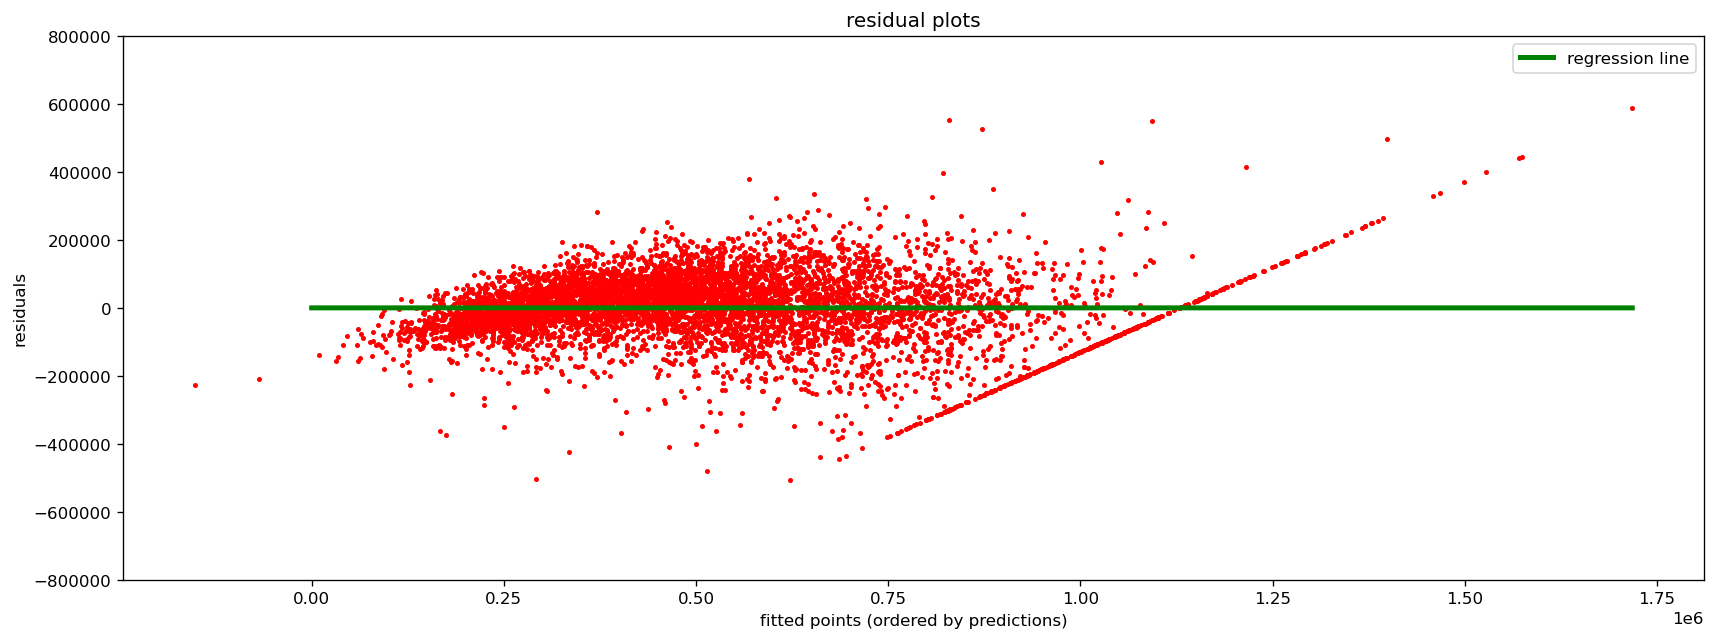

In [75]:
plt.figure(dpi=120,figsize=(17,6))

plt.scatter(residuals_table['prediction'],residuals_table['residuals'],color='red',s=4)
plt.plot(z,k,color='green',linewidth=3,label="regression line")
plt.ylim(-800000,800000)
plt.xlabel("fitted points (ordered by predictions)")
plt.ylabel("residuals")
plt.title("residual plots")
plt.legend()
plt.show()

# Distribution of Errors

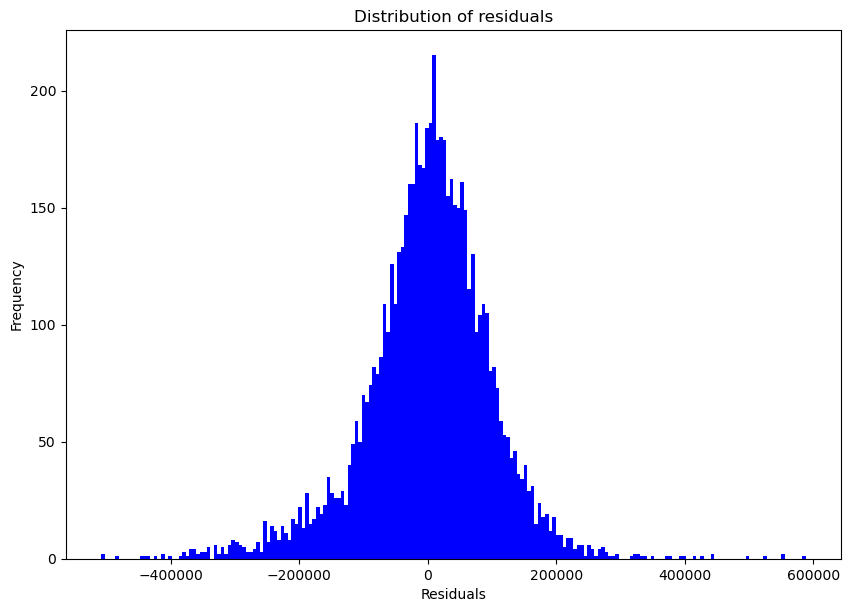

In [77]:
plt.figure(dpi=100,figsize=(10,7))
plt.hist(residuals_table['residuals'],color='blue',bins=200)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of residuals')
plt.show()

# Model Coefficient

In [78]:
coefficients_table = pd.DataFrame({
    "columns":X_train.columns,
    "coefficients":lr.coef_
})
coefficients_table = coefficients_table.sort_values(by='coefficients')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


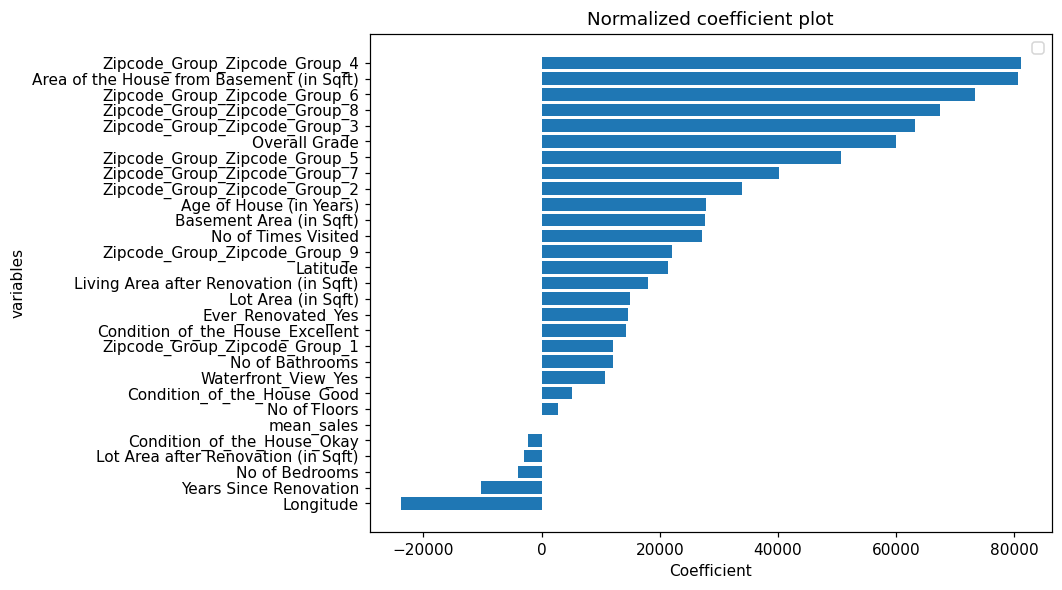

In [79]:
plt.figure(figsize=(8,6),dpi=110)
x = coefficients_table['columns']
y=coefficients_table['coefficients']
plt.barh(x,y)
plt.xlabel('Coefficient')
plt.ylabel('variables')
plt.title("Normalized coefficient plot")
plt.legend()
plt.show()